# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Import custom functions from 'regression_functions.py' ##
try:
    import importlib
    importlib.reload(fn)
except NameError: # It hasn't been imported yet
    import supervised_learning_functions as fn
    
sns.set()

# Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [7]:
data =  pd.read_csv('transfusion.data')
data.head()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0

# EDA

In [8]:
## Identify target and features ##
target = 'whether he/she donated blood in March 2007'
features = [x for x in data.columns if x != target]

## Describe the features ##
print(f'There are {len(features)} features in this dataset:')
for f in features:
    print(f'"{f}": type = {data[[f]].dtypes.values[0]}')

There are 4 features in this dataset:
"Recency (months)": type = int64
"Frequency (times)": type = int64
"Monetary (c.c. blood)": type = int64
"Time (months)": type = int64


In [9]:
display(data[features].describe())

Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
count        748.000000         748.000000             748.000000   
mean           9.506684           5.514706            1378.676471   
std            8.095396           5.839307            1459.826781   
min            0.000000           1.000000             250.000000   
25%            2.750000           2.000000             500.000000   
50%            7.000000           4.000000            1000.000000   
75%           14.000000           7.000000            1750.000000   
max           74.000000          50.000000           12500.000000   

       Time (months)  
count     748.000000  
mean       34.282086  
std        24.376714  
min         2.000000  
25%        16.000000  
50%        28.000000  
75%        50.000000  
max        98.000000

- All the features are on quite a different scale - make sure to perform scaling

In [10]:
## Scale features ##
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(data[features]),
                        columns=features)

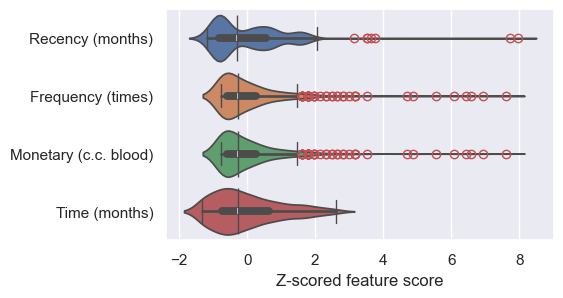

In [11]:
## Plot distributions of scaled features ##
sns.set()

## Set up subplots figure object to plot onto ##
fig, ax = plt.subplots(nrows=1, ncols=1,
                       figsize=(5,3))

## First plot violin plot to see distributions ##
sns.violinplot(X_scaled,
            orient='h',
            ax=ax)

## Next plot boxplots to get automatically calculated outliers (Tukey's method) ##
flierprops = dict(marker='o', markeredgecolor='r') # properties of outlier markers
sns.boxplot(X_scaled,
            boxprops=dict(alpha=0), # set boxplot color to completely transparent, to only visualize violin plot
            flierprops=flierprops, #set properties of outlier markers
            orient='h',
            ax=ax)
plt.xlabel('Z-scored feature score');

- All the distributions look fairly normal/standard except for recency, which looks like there are multiple distributions
- There are some outliers (according to Tukey's method) in all features except Time (shown by red circles)
- **What is driving the strange distribution of the Recency feature? Can we make sense of it by looking at the raw values?**

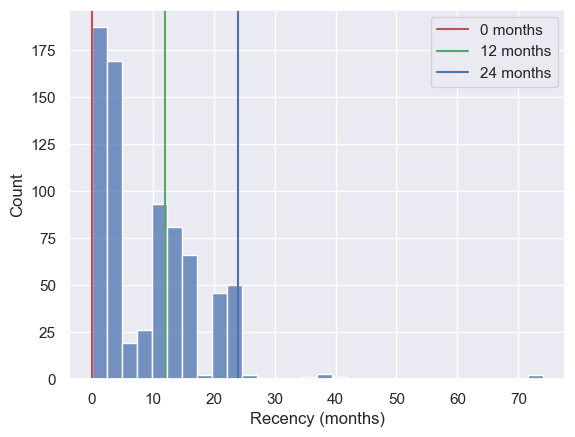

In [12]:
sns.histplot(data['Recency (months)'], bins=30)
plt.axvline(0, label='0 months', c='r')
plt.axvline(12, label='12 months', c='g')
plt.axvline(24, label='24 months', c='b')
plt.legend()

- Maybe there are some annual blood donation programs that many people take part in, which may be why there are what seems like "annual spikes", in terms of when blood was last donated. This is assuming that this data was collected at the time of one of these annual programs.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


- Looks like there are no null values, or empty strings to represent missing values

# Prepare data

**5.1 Should we remove outliers?**

In [14]:
data[features].describe().loc[['min','max'],:]

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
min               0.0                1.0                  250.0            2.0
max              74.0               50.0                12500.0           98.0

- The range of Recency, Frequency, and Time all seem like reasonable/plausible values
- Monetary (c.c. blood) is the total blood donated in mL. Given that ~400mL of blood is donated each visit, whether the outliers in this feature are "unrealistic/erroneous measures" would depend on the total number of visity (i.e. Frequency)

In [15]:
data['Avg_blood_per_visit'] = data['Monetary (c.c. blood)'] / data['Frequency (times)']
data

Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0                   2                 50                  12500   
1                   0                 13                   3250   
2                   1                 16                   4000   
3                   2                 20                   5000   
4                   1                 24                   6000   
..                ...                ...                    ...   
743                23                  2                    500   
744                21                  2                    500   
745                23                  3                    750   
746                39                  1                    250   
747                72                  1                    250   

     Time (months)  whether he/she donated blood in March 2007  \
0               98                                           1   
1               28                                           1   
2               35                                           1   
3               45                                           1   
4               77                                           0   
..             ...                                         ...   
743             38                                           0   
744             52                                           0   
745             62                                           0   
746             39                                           0   
747             72                                           0   

     Avg_blood_per_visit  
0                  250.0  
1                  250.0  
2                  250.0  
3                  250.0  
4                  250.0  
..                   ...  
743                250.0  
744                250.0  
745                250.0  
746                250.0  
747                250.0  

[748 rows x 6 columns]

- Ok so the Monetary feature is not an actual measure of how much blood was donated in total, but probably just calculated from the Frequency column (i.e. Frequency * 250)
- So Monetary and Frequency will be perfectly correlated, and one of those features should be removed as it is redundant
- **Now would be a good time to check the correlations between features just in case there are more feature relationships like this**

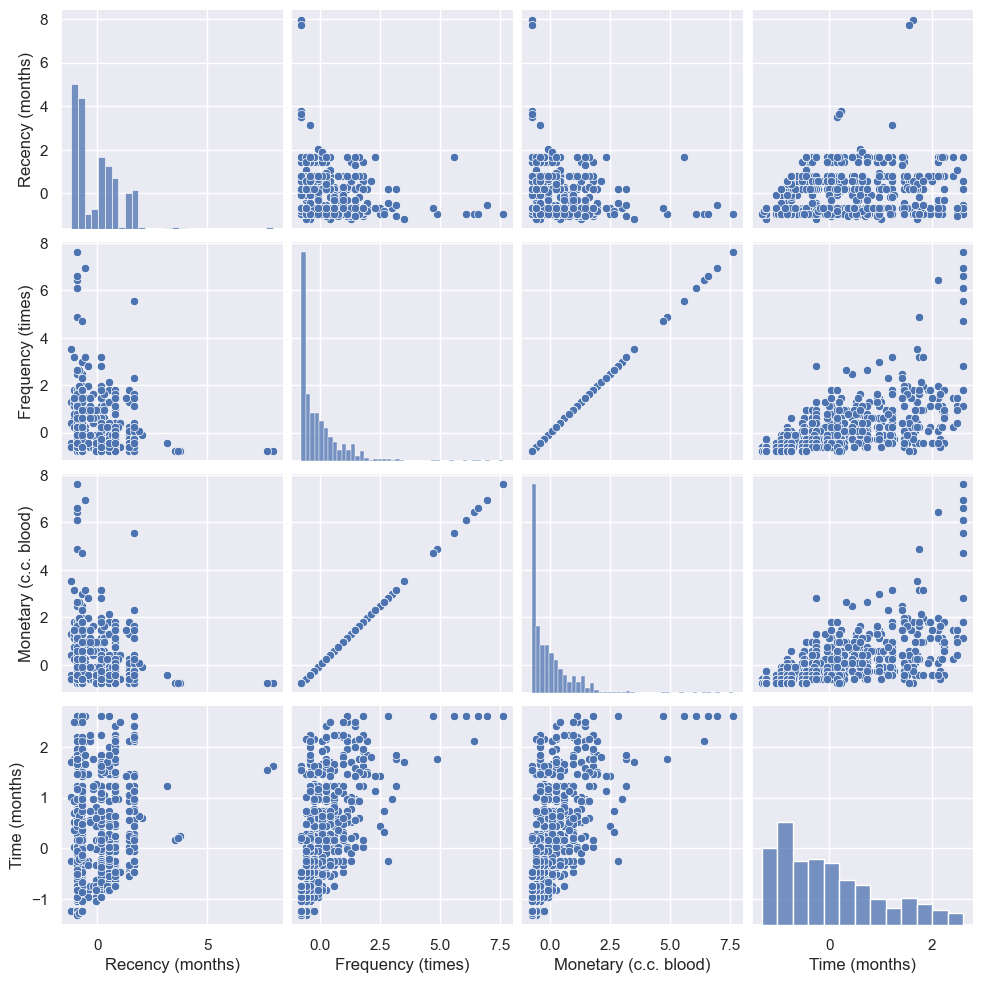

In [16]:
sns.pairplot(X_scaled)

- So just the frequency-monetary relationship that is correlated
- **Deciding to drop Monetary feature, since this is less likely to be a "true measure" compare to the frequency of visits. Will not remove outliers from other features for now, as all the values seem plausible**

In [17]:
X_filtered = X_scaled.drop('Monetary (c.c. blood)', axis=1)

**5.2 Should we do feature engineering?**

- It is tempting to feature engineer the Recency feature given the strange distribution and its potential relationship to some kind of "annual donation program". Would need to ask SME about this, as taking part in an annual donation program may be important in determining whether they donated in March 2007 (if the program happened in march...). Will first see how important this feature is without feature engineering and reconsider.

# Modelling

1. **It seems like the target is supposed to be whether they donated in March 2007 or not (i.e. binary target), using features that relate to the frequency/history of donations (continuous variables).**
2. **Binary classification/supervised learning is the way to go here**

# Split the Data

23.799999999999997% of people donated in March 2007


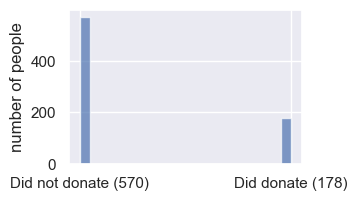

In [18]:
## Let's look at the distribution of targets ##
y = data[[target]]

## Plot histogram ##
plt.figure(figsize=(3,2))
plt.hist(y, bins=20,alpha=0.7)

## Set axes ##
counts = y.value_counts()
plt.xticks([0,1],[f'{label} ({count})' for label,count in zip(['Did not donate','Did donate'], counts)])
plt.ylabel('number of people');

prop_donated = round((counts[1] / (counts[0]+counts[1])),3)
print(f'{prop_donated*100}% of people donated in March 2007')

- Yikes, that's pretty imbalanced. Might be worth using some imblearn techniques in the future (e.g. random oversampling) but will stick with just stratifying the data splitting, and use class_weight parameter of sklearn classifiers to penalize mistakes on the different classes by their weight.
- Since the smaller class has enough samples, will use a relatively high kfold cross-validation of 5 folds

**7.1 Data splitting code sample**
- This is the data splitting I will be using for my randomized search cross-validation later

In [19]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Define the Model

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Step 9: Fit the Model

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



